In [1]:
pip install graphviz


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
import graphviz

In [4]:
df = pd.read_csv('heart.csv')
X = df.drop('target', axis=1)
y = df['target']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:

dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)


dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [13]:

y_train_pred_full = dt_full.predict(X_train)
y_test_pred_full = dt_full.predict(X_test)
print("--- Full Decision Tree ---")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_full):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_full):.4f}")


y_train_pred_pruned = dt_pruned.predict(X_train)
y_test_pred_pruned = dt_pruned.predict(X_test)
print("\n--- Pruned Decision Tree (max_depth=4) ---")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_pruned):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_pruned):.4f}")

--- Full Decision Tree ---
Training Accuracy: 1.0000
Test Accuracy: 0.9708

--- Pruned Decision Tree (max_depth=4) ---
Training Accuracy: 0.8968
Test Accuracy: 0.8344


In [14]:

y_train_pred_full = dt_full.predict(X_train)
y_test_pred_full = dt_full.predict(X_test)
print("--- Full Decision Tree ---")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_full):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_full):.4f}")


y_train_pred_pruned = dt_pruned.predict(X_train)
y_test_pred_pruned = dt_pruned.predict(X_test)
print("\n--- Pruned Decision Tree (max_depth=4) ---")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_pruned):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_pruned):.4f}")

--- Full Decision Tree ---
Training Accuracy: 1.0000
Test Accuracy: 0.9708

--- Pruned Decision Tree (max_depth=4) ---
Training Accuracy: 0.8968
Test Accuracy: 0.8344


In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)
print("--- Random Forest Performance ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

--- Random Forest Performance ---
Test Accuracy: 0.9805


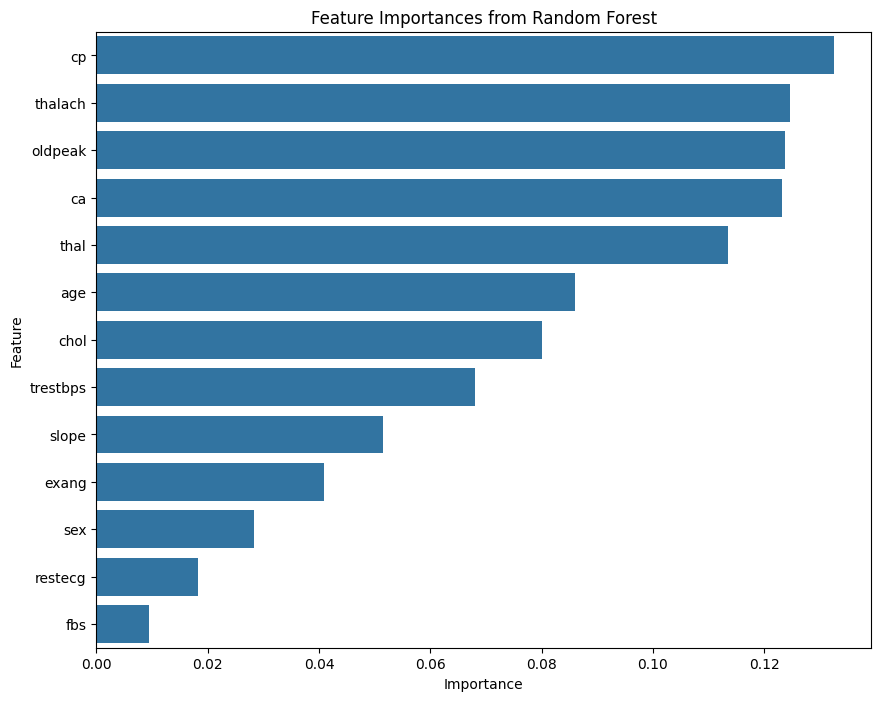

In [16]:

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

In [17]:

cv_scores_dt = cross_val_score(dt_pruned, X, y, cv=5)
print("--- Cross-Validation: Pruned Decision Tree ---")
print(f"Mean CV Score: {cv_scores_dt.mean():.4f}")

cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print("\n--- Cross-Validation: Random Forest ---")
print(f"Mean CV Score: {cv_scores_rf.mean():.4f}")

--- Cross-Validation: Pruned Decision Tree ---
Mean CV Score: 0.8341

--- Cross-Validation: Random Forest ---
Mean CV Score: 0.9971
